 # Introduction
 We are using Machine learning technique to determine the chances for getting heart diseaseU with features like age, bp and so forth.

In [108]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product
from dython.nominal import associations
from pandas.api.types import is_numeric_dtype


In [109]:
#import file
df = pd.read_csv(r'C:\Users\kytan\Desktop\kidney_disease.csv')

# data frame info
print(df.shape)
# print(df.info())
print(df.columns) 
# df['bp'].unique()  # check bp categorical features


(400, 26)
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [110]:
df = df.drop(['id'], axis=1)

In [111]:
# check distinct value
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [112]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [113]:
probColumns1 = ['rc','dm','cad','pcv','wc','classification']

for i in probColumns1:
    df[i] = df[i].str.replace('\t','')

df['dm'] = df['dm'].str.replace(' yes','yes')


In [114]:
probColumns2 = ['rc','dm','cad','pcv','wc']

for i in probColumns2:
    df[i] = df[i].replace('?',np.mean(pd.to_numeric(df[i], errors='coerce')))

In [115]:
# checking null value
df_clean.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [116]:

df = df.fillna(method="ffill",limit=1)

for i in df.columns:

    if is_string_dtype(i):
        df_clean = df.fillna(df.mean())
    else:
        df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [117]:
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))


['rc',
 'appet',
 'ba',
 'ane',
 'pc',
 'pcv',
 'wc',
 'pe',
 'cad',
 'rbc',
 'dm',
 'pcc',
 'htn',
 'classification']

In [118]:
from pandas.api.types import is_string_dtype
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
catColumns = ['appet','ba','pc','ane','pe','cad','rbc','dm','pcc','htn','classification']

for i in catColumns:
    df_clean[i]= lab.fit_transform(df_clean[i])


In [119]:
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


Data visualisation

In [120]:
df.groupby('classification').mean()

C:\Users\kytan\AppData\Local\Temp\ipykernel_13092\2501411280.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('classification').mean()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,
ckd,54.586345,79.156627,1.013939,1.704453,0.722449,173.489627,71.876305,4.343173,133.876168,4.770561,10.622314
notckd,46.526667,71.400000,1.022433,0.000000,0.000000,108.333333,32.840000,0.874000,141.726667,4.350667,15.183333


In [121]:
from scipy import stats
df_numerical = df.select_dtypes(exclude='object')

df_clean[(np.abs(stats.zscore(df_numerical)) < 3).all(axis=1)]




,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


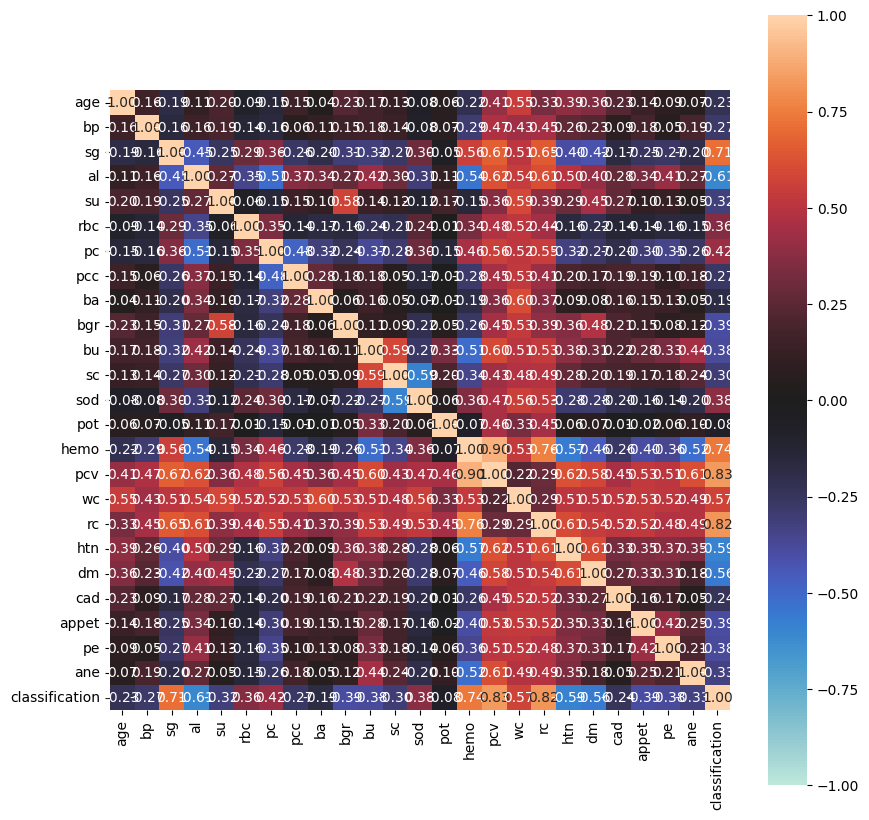

C:\Users\kytan\AppData\Local\Temp\ipykernel_13092\1737723815.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.00,0.16,-0.19,0.11,0.20,-0.09,-0.15,0.15,0.04,0.23,0.17,0.13,-0.08,0.06,-0.22,0.41,0.55,0.33,0.39,0.36,0.23,0.14,0.09,0.07,-0.23
bp,0.16,1.00,-0.16,0.16,0.19,-0.14,-0.16,0.06,0.11,0.15,0.18,0.14,-0.08,0.07,-0.29,0.47,0.43,0.45,0.26,0.23,0.09,0.18,0.05,0.19,-0.27
sg,-0.19,-0.16,1.00,-0.45,-0.25,0.29,0.36,-0.26,-0.20,-0.31,-0.32,-0.27,0.30,-0.05,0.56,0.67,0.51,0.65,-0.40,-0.42,-0.17,-0.25,-0.27,-0.20,0.71
al,0.11,0.16,-0.45,1.00,0.27,-0.35,-0.51,0.37,0.34,0.27,0.42,0.30,-0.31,0.11,-0.54,0.62,0.54,0.61,0.50,0.40,0.28,0.34,0.41,0.27,-0.61
su,0.20,0.19,-0.25,0.27,1.00,-0.06,-0.15,0.15,0.10,0.58,0.14,0.12,-0.12,0.17,-0.15,0.36,0.59,0.39,0.29,0.45,0.27,0.10,0.13,0.05,-0.32
rbc,-0.09,-0.14,0.29,-0.35,-0.06,1.00,0.35,-0.14,-0.17,-0.16,-0.24,-0.21,0.24,0.01,0.34,0.48,0.52,0.44,-0.16,-0.22,-0.14,-0.14,-0.16,-0.15,0.36
pc,-0.15,-0.16,0.36,-0.51,-0.15,0.35,1.00,-0.48,-0.32,-0.24,-0.37,-0.28,0.30,-0.15,0.46,0.56,0.52,0.55,-0.32,-0.27,-0.20,-0.30,-0.35,-0.26,0.42
pcc,0.15,0.06,-0.26,0.37,0.15,-0.14,-0.48,1.00,0.28,0.18,0.18,0.05,-0.17,-0.01,-0.28,0.45,0.53,0.41,0.20,0.17,0.19,0.19,0.10,0.18,-0.27
ba,0.04,0.11,-0.20,0.34,0.10,-0.17,-0.32,0.28,1.00,0.06,0.16,0.05,-0.07,-0.01,-0.19,0.36,0.60,0.37,0.09,0.08,0.16,0.15,0.13,0.05,-0.19
bgr,0.23,0.15,-0.31,0.27,0.58,-0.16,-0.24,0.18,0.06,1.00,0.11,0.09,-0.22,0.05,-0.26,0.45,0.53,0.39,0.36,0.48,0.21,0.15,0.08,0.12,-0.39


In [122]:
complete_correlation= associations(df_clean, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


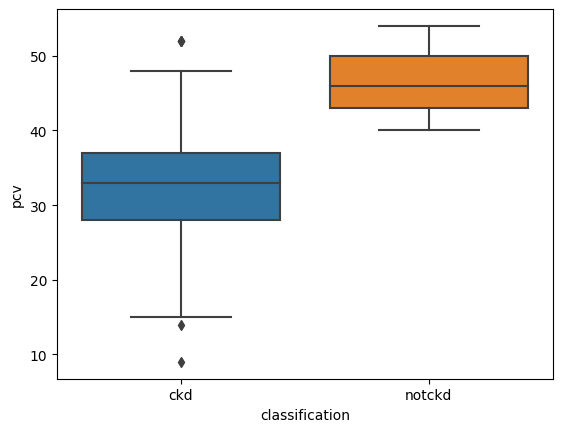

In [123]:
sns.boxplot(x="classification", y=df['pcv'].astype('float'), data=df)
plt.show()

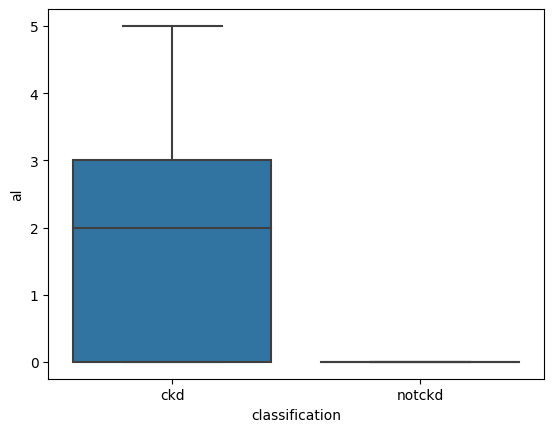

In [124]:

# Show each observation with a scatterplot
sns.boxplot(
    data=df, x="classification", y="al")

plt.show()

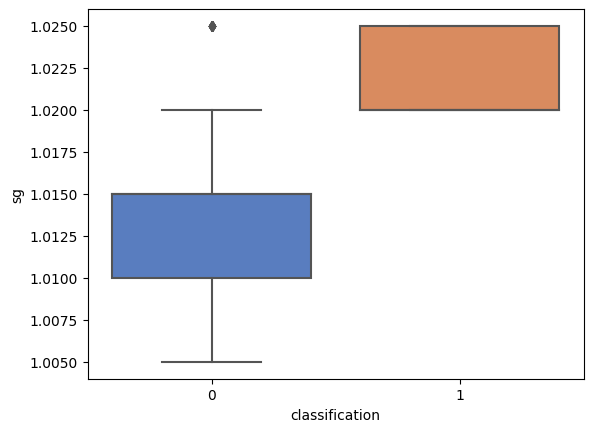

In [125]:
s = df.astype(str)
sns.boxplot(data=df_clean,
            x="classification",
            y="sg",
            palette = "muted"
           )
plt.show()


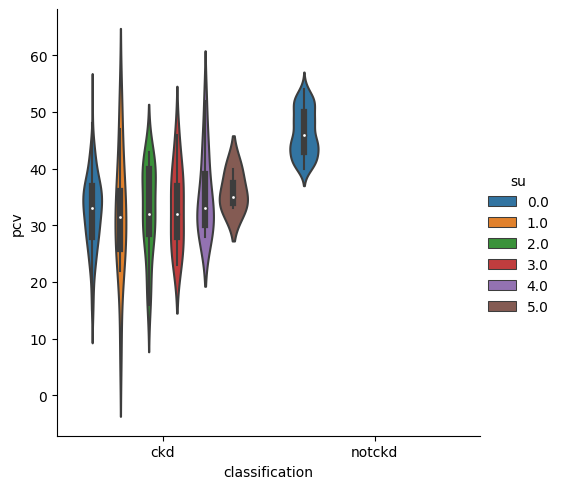

In [126]:
df['pcv']=df['pcv'].astype(float)
sns.catplot(
    data=df, x="classification", y="pcv", hue="su", kind="violin",
)
plt.show()


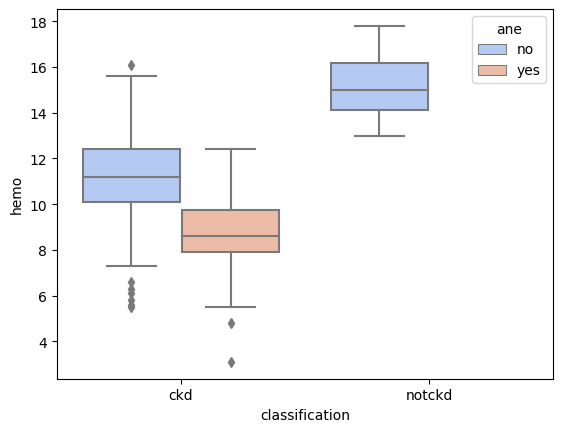

In [127]:
sns.boxplot(x="classification", y="hemo", hue="ane",data=df, palette="coolwarm")
plt.show()


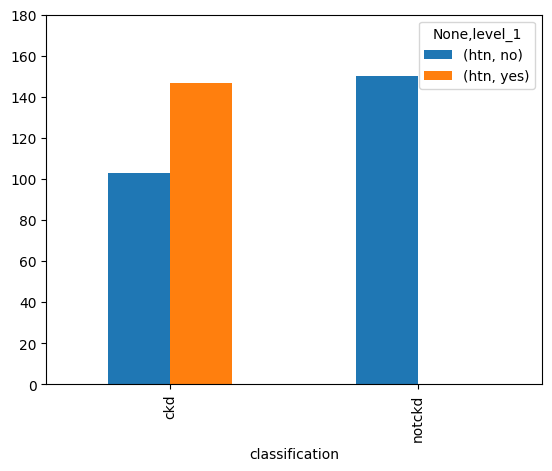

In [128]:

pd.DataFrame(df.groupby('classification')['htn'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()

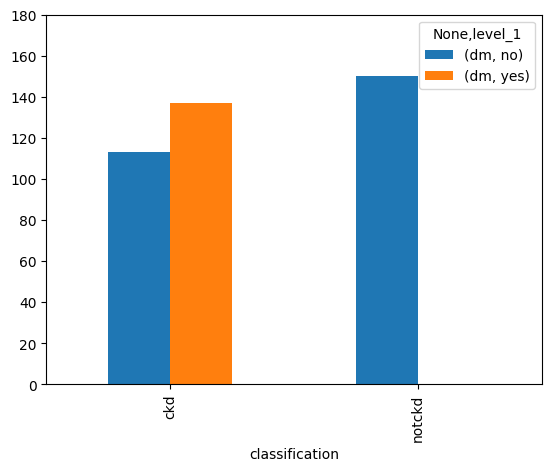

In [129]:

pd.DataFrame(df.groupby('classification')['dm'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()


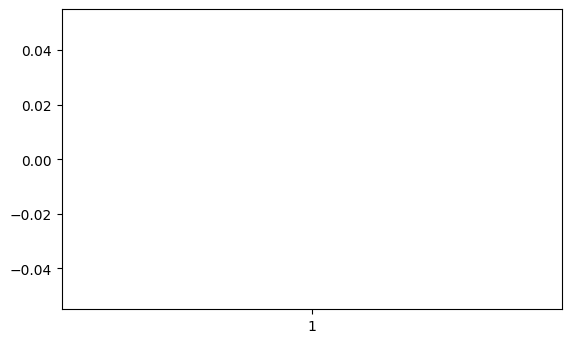

In [130]:
# data visualisation
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['bp'])
plt.show()


In [131]:
# Split dataset into random train and test subsets:
X = df_clean.iloc[:, :-1].values
y = df_clean.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(400, 24) (400,)
[[52.0 100.0 1.015 3.0 0.0 1 0 1 0 138.0 60.0 1.9 135.0 5.0 10.8 '33'
  '9600' '4.0' 1 1 0 0 0 1]
 [50.0 70.0 1.02 0.0 0.0 1 1 0 0 109.0 32.0 1.4 139.0 4.7 15.0 '41'
  '13200' '4.7' 0 0 0 1 0 0]
 [17.0 70.0 1.015 1.0 0.0 0 1 0 0 22.0 1.5 7.3 145.0 2.8 13.1 '41'
  '11200' '4.9' 0 0 0 0 0 0]
 [44.0 60.0 1.02 0.0 0.0 1 1 0 0 95.0 46.0 0.5 138.0 4.2 15.0 '50' '7700'
  '6.3' 0 0 0 0 0 0]
 [68.0 80.0 1.01 3.0 2.0 1 0 1 1 157.0 90.0 4.1 130.0 6.4 5.6 '16'
  '11000' '2.6' 1 1 1 1 1 0]]
[0 0 0 1 0]


In [132]:
# fit the model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)